<a href="https://colab.research.google.com/github/konkasivaji/690-stats-and-visu/blob/main/Assignment_08/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


  #1 Use Pandas to read the file census_costs.txt file

In [54]:
df =pd.read_csv("https://raw.githubusercontent.com/DATA-690-SPRING-2022/WANG/main/assignment_04/census_costs.txt", skiprows=1, sep='\t')
df

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


  2. Find out how many rows and columns it has

In [55]:
df.shape

(23, 4)

  3. Display first 10, last 10, and random 10 rows

In [56]:
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [57]:
df.tail(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [58]:
df.sample(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
4,1830,"12,866,020","$378,545",2.94 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
0,1790,"3,929,214","$44,377",1.13 cents
12,1910,"91,972,266","$15,968,000",17.07 cents
1,1800,"5,308,483","$66,109",1.24 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
20,1990,"248,718,301","$2,492,830,000",$10.02
5,1840,"17,069,458","$833,371",4.88 cents


  4. Find out the data types of all columns - use info() function

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


  5. Find out the summary statistics of all columns

In [60]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1790,"3,929,214","$44,377",1.13 cents
freq,1,1,1,1


  6. Cleanse the data to make the year, population, cost, cost per person numerical type

In [61]:
def cleansing(x):
    y=x.replace('*','').replace('$','').replace(' Billion','').replace(' cents','').replace(',','')
    return y

In [62]:
df['Census Year'] = df['Census Year'].apply(cleansing)
df['Total Population'] = df['Total Population'].apply(cleansing)
df['Census Cost'] = df['Census Cost'].apply(cleansing)
df['Average Cost Per Person'] = df['Average Cost Per Person'].apply(cleansing)

In [63]:
pd.to_numeric(df['Census Year'])
df['Census Year'] = pd.to_numeric(df['Census Year'])
df['Total Population'] = pd.to_numeric(df['Total Population'])
df['Census Cost'] = pd.to_numeric(df['Census Cost'])
df['Average Cost Per Person'] = pd.to_numeric(df['Average Cost Per Person'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Census Year              23 non-null     int64  
 1   Total Population         23 non-null     int64  
 2   Census Cost              23 non-null     float64
 3   Average Cost Per Person  23 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 864.0 bytes


  7. Find out the summary statistics of the numerical columns - use describe() function

In [65]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,1.836891e+08,17.921739
std,67.8233,9.622629e+07,5.516392e+08,20.200432
min,1790.0000,3.929214e+06,4.500000e+00,1.130000
25%,1845.0000,2.013067e+07,2.935355e+05,3.850000
50%,1900.0000,7.630339e+07,5.790678e+06,10.020000
75%,1955.0000,1.653245e+08,5.384150e+07,21.045000
max,2010.0000,3.087455e+08,2.492830e+09,71.340000


  8. Use Plotly to plot the average cost per person over time.

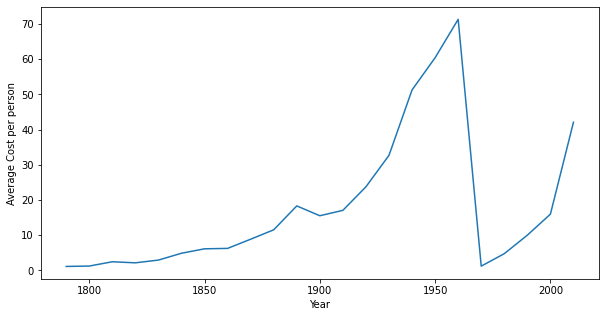

In [66]:
plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Average Cost per person')
plt.plot(df['Census Year'],df['Average Cost Per Person'])

  9. Use Plotly to plot the scatter plot of Total Population vs Total Cost.

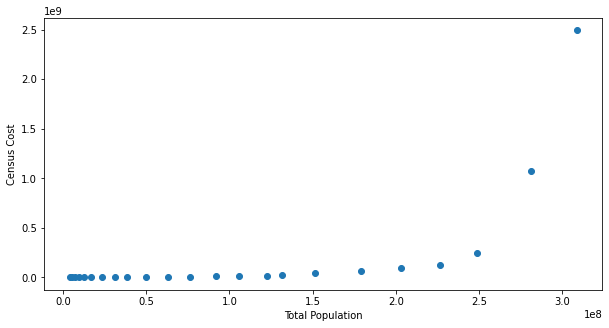

In [67]:
plt.figure(figsize=(10, 5))
plt.xlabel('Total Population')
plt.ylabel('Census Cost')
plt.scatter(df['Total Population'].sort_values(),df['Census Cost'].sort_values())